In [2]:
import warnings
from pathlib import Path

import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from notebooks.fixed_sankey_plot import sankey
from sklearn import metrics

# Surpress user warnings
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

# LaTeX plotting
# matplotlib.use("pgf")
# plt.rcParams["pgf.texsystem"] = "pdflatex"
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["text.usetex"] = True
# plt.rcParams["pgf.rcfonts"] = False


sns.set_theme(style="white")
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["legend.fontsize"] = 6.5
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["ytick.left"] = True
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.major.pad"] = 0
plt.rcParams["xtick.bottom"] = True
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.major.pad"] = 0

plt.rcParams["axes.titlesize"] = 8
plt.rcParams["legend.handletextpad"] = 0.3
plt.rcParams["lines.markersize"] = 0.5
plt.rcParams["savefig.pad_inches"] = 0.01
sns.set_palette("deep")

plt.style.use("default")
sns.set_palette("deep")
sns.set_context("paper")  # Set to "paper" for use in paper :)

# plt.rcParams['figure.figsize'] = (10, 6)

REPO_ROOT = Path().resolve()
RESULTS_DIR = Path("./results/references")
RESULTS_DIR.mkdir(exist_ok=True, parents=True)

DATASET_PATH = REPO_ROOT / "dataset/cc_november_23/dataset.json"
PREDICTIONS_PATH = REPO_ROOT / "dataset/reference_prediction/predictions.csv"

SMARTCARD_CATEGORY = "ICs, Smart Cards and Smart Card-Related Devices and Systems"
CARD_RELATED_CAT = {"Other Devices and Systems", "Products for Digital Signatures", "Trusted Computing"}
OTHERS_CAR = {
    "Access Control Devices and Systems",
    "Biometric Systems and Devices",
    "Boundary Protection Devices and Systems",
    "Data Protection",
    "Databases",
    "Detection Devices and Systems",
    "Key Management Systems",
    "Mobility",
    "Multi-Function Devices",
    "Network and Network-Related Devices and Systems",
    "Operating Systems",
}

## Top-reach certificates in time

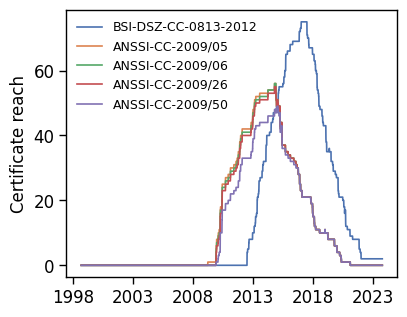

In [12]:
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

df_to_plot = pd.read_csv(RESULTS_DIR / "average_reach_over_time.csv", parse_dates=["date"])

plt.figure()
g = sns.lineplot(data=df_to_plot, x="date", y="reach", hue="certificate", errorbar=None)

plt.legend(frameon=False, handlelength=2)
g.set_xlabel("")
g.set_ylabel("Certificate reach", fontsize=12)


dtFmt = mdates.DateFormatter("%Y")  # define the formatting
g.xaxis.set_major_formatter(dtFmt)
g.set_xticks(
    [
        pd.to_datetime("1998-01-01"),
        pd.to_datetime("2003-01-01"),
        pd.to_datetime("2008-01-01"),
        pd.to_datetime("2013-01-01"),
        pd.to_datetime("2018-01-01"),
        pd.to_datetime("2023-01-01"),
    ]
)
g.figure.set_size_inches(3.9, 3)
plt.tight_layout(pad=0.1)
g.figure.savefig(RESULTS_DIR / "lineplot_top_reach.pdf")
g.figure.show()

## Average number of transitive references over time

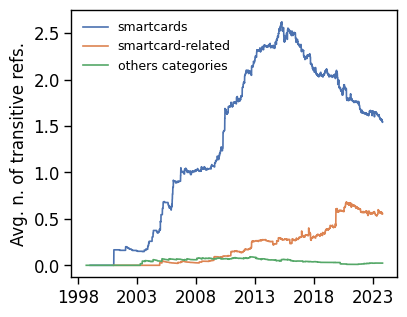

In [13]:
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

df_to_plot = pd.read_csv(RESULTS_DIR / "avg_refs_over_time.csv", parse_dates=["date"])
plt.figure()
g = sns.lineplot(data=df_to_plot, x="date", y="n_references", hue="category", errorbar=None)

plt.legend(frameon=False, handlelength=2)
g.set_xlabel("")
g.set_ylabel("Avg. n. of transitive refs.", fontsize=12)

dtFmt = mdates.DateFormatter("%Y")  # define the formatting
g.xaxis.set_major_formatter(dtFmt)
g.set_xticks(
    [
        pd.to_datetime("1998-01-01"),
        pd.to_datetime("2003-01-01"),
        pd.to_datetime("2008-01-01"),
        pd.to_datetime("2013-01-01"),
        pd.to_datetime("2018-01-01"),
        pd.to_datetime("2023-01-01"),
    ]
)
g.figure.set_size_inches(3.9, 3)
plt.tight_layout(pad=0.1)
g.figure.savefig(
    RESULTS_DIR / "lineplot_avg_refs.pdf",
)
g.figure.show()

## Average reach over time

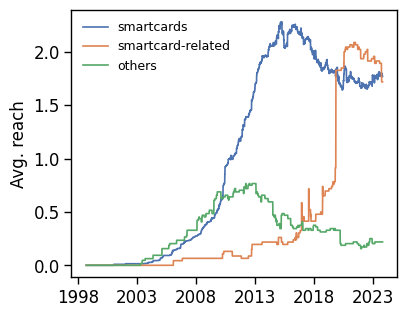

In [14]:
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

df_to_plot = pd.read_csv(RESULTS_DIR / "avg_reach_over_time.csv", parse_dates=["date"])
plt.figure()
g = sns.lineplot(data=df_to_plot, x="date", y="n_references", hue="category", errorbar=None)

plt.legend(frameon=False, handlelength=2)
g.set_xlabel("")
g.set_ylabel("Avg. reach", fontsize=12)

dtFmt = mdates.DateFormatter("%Y")  # define the formatting
g.xaxis.set_major_formatter(dtFmt)
g.set_xticks(
    [
        pd.to_datetime("1998-01-01"),
        pd.to_datetime("2003-01-01"),
        pd.to_datetime("2008-01-01"),
        pd.to_datetime("2013-01-01"),
        pd.to_datetime("2018-01-01"),
        pd.to_datetime("2023-01-01"),
    ]
)
g.figure.set_size_inches(3.9, 3)
plt.tight_layout(pad=0.1)
g.figure.savefig(RESULTS_DIR / "lineplot_avg_reach.pdf")
g.figure.show()

## Area under curve

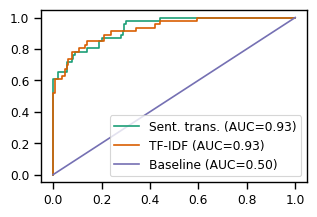

In [24]:
plt.figure(figsize=(3, 2))

colors = plt.cm.Dark2(np.linspace(0, 1, 8))

df_sent = pd.read_csv(RESULTS_DIR / "df_pred_sentence_transformers.csv")
df_tf_idf = pd.read_csv(RESULTS_DIR / "df_pred_tf_idf.csv")
df_baseline = pd.read_csv(RESULTS_DIR / "df_pred_baseline.csv")

fpr, tpr, thresholds = metrics.roc_curve(df_sent.y_true, df_sent.y_pred)
auc = metrics.roc_auc_score(df_sent.y_true, df_sent.y_pred)
plt.plot(fpr, tpr, label=f"Sent. trans. (AUC={auc:.2f})", color=colors[0])

fpr, tpr, thresholds = metrics.roc_curve(df_tf_idf.y_true, df_tf_idf.y_pred)
auc = metrics.roc_auc_score(df_tf_idf.y_true, df_tf_idf.y_pred)
plt.plot(fpr, tpr, label=f"TF-IDF (AUC={auc:.2f})", color=colors[1])

fpr, tpr, thresholds = metrics.roc_curve(df_baseline.y_true, df_baseline.y_pred)
auc = metrics.roc_auc_score(df_baseline.y_true, df_baseline.y_pred)
plt.plot(fpr, tpr, label=f"Baseline (AUC={auc:.2f})", color=colors[2])

plt.legend(loc="lower right")
plt.tight_layout(pad=0.1)
plt.savefig(RESULTS_DIR / "roc_auc.pdf")
plt.show()

## Stack-bar plot of annotations in categories

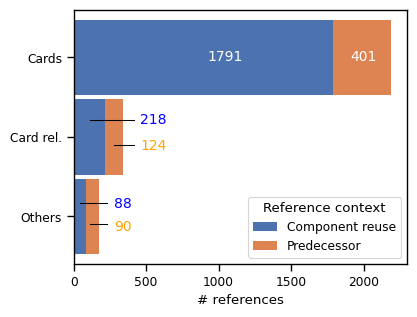

In [142]:
df = pd.read_csv(RESULTS_DIR / "ref_categories_stackplot.csv")
ax = df.plot.barh(stacked=True, figsize=(4, 3), rot=0, width=0.95)
ax.set_ylim(-0.6, 2.6)
ax.set_xlabel("# references")
ax.set_yticklabels(["Others", "Card rel.", "Cards"])
ax.legend(title="Reference context", loc="lower right")

plt.text(0.4, 0.8, df.iloc[2]["Component reuse"], transform=ax.transAxes, color="white", fontsize=10)
plt.text(0.83, 0.8, df.iloc[2]["Predecessor"], transform=ax.transAxes, color="white", fontsize=10)

plt.axhline(y=1.21, xmin=0.05, xmax=0.18, color="black", linewidth=0.75)
plt.axhline(y=0.9, xmin=0.12, xmax=0.18, color="black", linewidth=0.75)
plt.text(0.2, 0.55, df.iloc[1]["Component reuse"], transform=ax.transAxes, color="blue", fontsize=10)
plt.text(0.2, 0.45, df.iloc[1]["Predecessor"], transform=ax.transAxes, color="orange", fontsize=10)

plt.axhline(y=0.17, xmin=0.02, xmax=0.1, color="black", linewidth=0.75)
plt.axhline(y=-0.1, xmin=0.05, xmax=0.1, color="black", linewidth=0.75)
plt.text(0.12, 0.22, df.iloc[0]["Component reuse"], transform=ax.transAxes, color="blue", fontsize=10)
plt.text(0.12, 0.13, df.iloc[0]["Predecessor"], transform=ax.transAxes, color="orange", fontsize=10)

plt.tight_layout(pad=0.1)
plt.savefig(RESULTS_DIR / "stacked_barplot.pdf")

## Archived certificate half-life

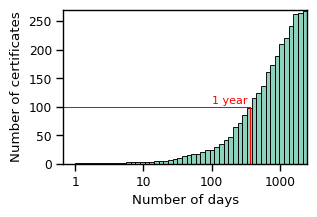

In [8]:
plt.figure()

matplotlib.rcParams["xtick.minor.size"] = 0
matplotlib.rcParams["xtick.minor.width"] = 0

df = pd.read_csv(RESULTS_DIR / "archived_half_life.csv")
sns.set_palette("Set2")
g = sns.histplot(data=df.n_days, log_scale=True, bins=50, cumulative=True)

g.set_xlabel("Number of days")
g.set_ylabel("Number of certificates")

n_under_year = df.loc[df.n_days <= 365].shape[0]
horizontal_limit = 365 / df.n_days.max()
vertical_limit = n_under_year / 270

g.set_xlim(0, df.n_days.max())
g.set_ylim(0, 270)
g.set_xticks([1, 10, 100, 1000], [1, 10, 100, 1000])
plt.axvline(x=365, ymin=0, ymax=0.37, color="red", linewidth=0.75, linestyle="solid")
plt.axhline(y=100, xmin=0, xmax=0.765, color="red", linewidth=0.75, linestyle="solid")
plt.text(100, 106, "1 year", color="red", fontsize=8)
g.figure.set_size_inches(3, 2)
plt.tight_layout(pad=0.1)

g.figure.savefig(RESULTS_DIR / "histogram_half_life.pdf")
g.figure.show()